# Introduction to Principal Components Analysis (PCA)

See this [stackexchange page](https://opendata.stackexchange.com/questions/7793/age-weight-and-height-dataset) for links to height and weight datasets. Let us try something very Canadian..

In [1]:
data = read.csv("https://figshare.com/ndownloader/files/5303173")
head(data)
dim(data)

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>
1,2001,RUS,10,tverdovsky oleg,D,L,185,84,1976-05-18,anaheim mighty ducks,24.95277,1976,24.54346
2,2001,RUS,2,vichnevsky vitali,D,L,188,86,1980-03-18,anaheim mighty ducks,21.11978,1980,24.33228
3,2001,RUS,26,petrochinin evgeni,D,L,182,95,1976-02-07,severstal cherepovetal,25.22930,1976,28.68011
4,2001,RUS,28,zhdan alexander,D,R,178,85,1971-08-28,ak bars kazan,29.67556,1971,26.82742
5,2001,RUS,32,orekhovsky oleg,D,R,175,88,1977-11-03,dynamo moscow,23.49076,1977,28.73469
6,2001,RUS,4,zhukov sergei,D,L,193,93,1975-11-23,lokomotiv yaroslavl,25.43737,1975,24.96711


[1] 6292   13

In case you are wondering, this is a database of ice hockey players at IIHF world championships, 2001-2016, assembled by the dataset's author. See some comments [here](https://ikashnitsky.github.io/2017/ice-hockey-players-height/). As usual, it is a good idea to plot this to get a sense of the lay of the land.

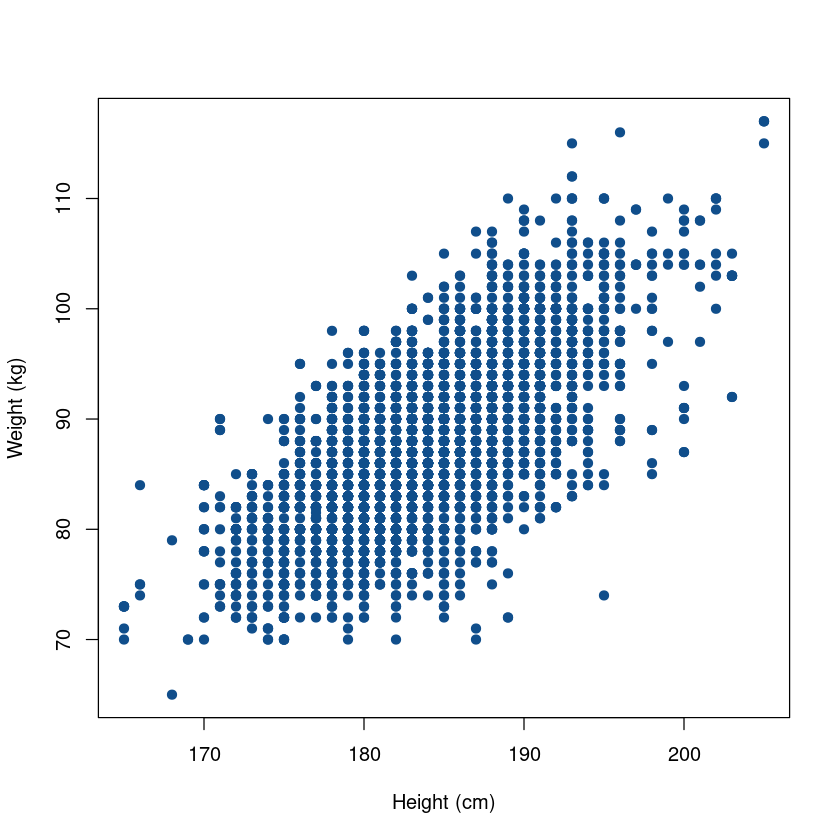

In [2]:
plot(data$height, data$weight,
    pch = 19, col = "dodgerblue4",
    xlab = "Height (cm)", ylab = "Weight (kg)")

The author of the study is interested in the evolution of weights, so it is likely that the same person will be in the dataset several times. Let us check this. First check will be `FALSE` if the number of unique names does not match the

In [3]:
length(unique(data$name)) == dim(data)[1]
length(unique(data$name))

[1] FALSE

[1] 3278

We are not interested in the evolution of weights, so far, so let us simplify things: if we have more than one record for someone, let us take their weight as the average of the weights recorded for them. To be extra careful, we could check as well that there are no major variations on player height, as this could indicate homonymies.

In [3]:
# First, we make a data frame with just the names
data_simplified = data.frame(name = unique(data$name))
w = c()
h = c()
for (n in data_simplified$name) {
    tmp = data[which(data$name == n),]
    h = c(h, mean(tmp$height))
    w = c(w, mean(tmp$weight))
}
data_simplified$weight = w
data_simplified$height = h

head(data_simplified)
# Now keep that data (and call it data so it's easier)
data = data_simplified

,name,weight,height
,<chr>,<dbl>,<dbl>
1,tverdovsky oleg,84.0,185.0
2,vichnevsky vitali,86.0,188.0
3,petrochinin evgeni,95.0,182.0
4,zhdan alexander,85.5,178.5
5,orekhovsky oleg,88.0,175.0
6,zhukov sergei,92.5,193.0


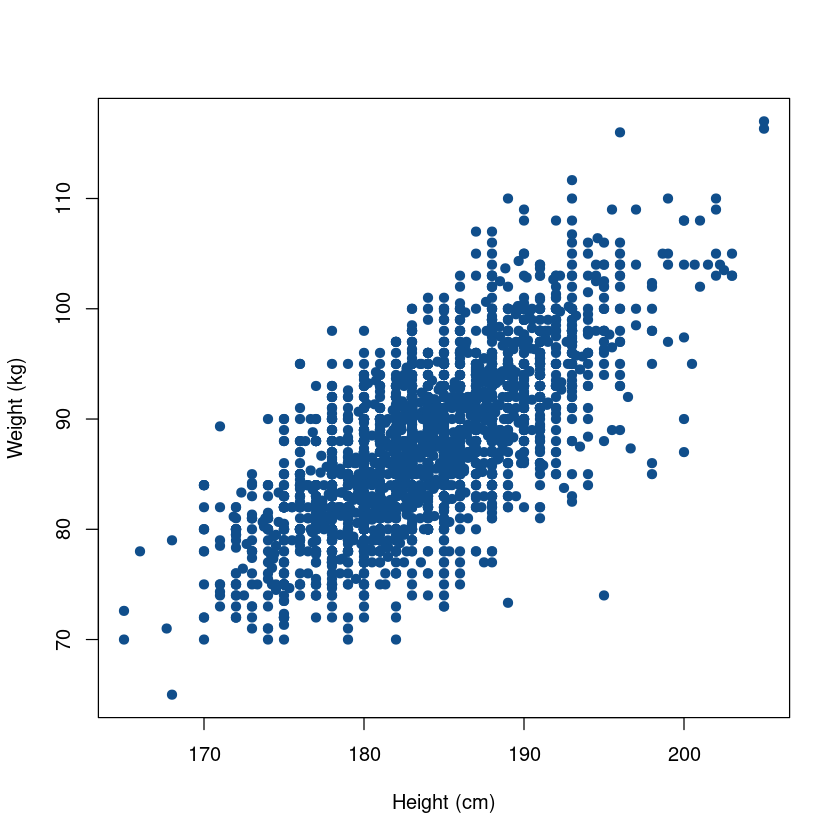

In [4]:
plot(data$height, data$weight,
    pch = 19, col = "dodgerblue4",
    xlab = "Height (cm)", ylab = "Weight (kg)")

Let us centre the data and plot the result.

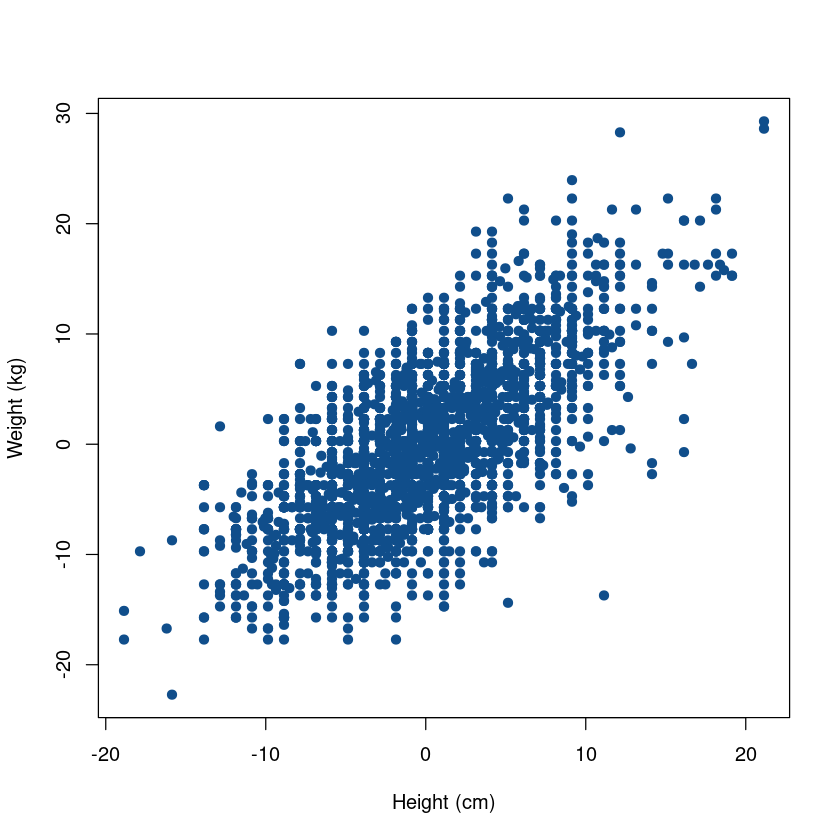

In [5]:
data$weight.c = data$weight-mean(data$weight)
data$height.c = data$height-mean(data$height)
plot(data$height.c, data$weight.c,
    pch = 19, col = "dodgerblue4",
    xlab = "Height (cm)", ylab = "Weight (kg)")

In [6]:
mean(data$weight)
mean(data$height)

[1] 87.71555

[1] 183.8596

The function `cov` returns the covariance of two samples. Note that the functions deals equally well with data that is not centred as with data that is centred.

In [7]:
cov(data$height, data$weight)
cov(data$height.c, data$weight.c)

[1] 26.63506

[1] 26.63506

As we could see from plotting the data, there is a positive linear relationship between the two variables. Let us compute the sample covariance matrix.

In [8]:
# Select X as the matrix we want to process
X = as.matrix(data[,c("height.c", "weight.c")])
S = 1/(dim(X)[1]-1)*t(X) %*% X
S

,height.c,weight.c
height.c,29.66176,26.63506
weight.c,26.63506,47.81112


The off-diagonal entries do match the computed covariance. Let us check that the variances are indeed a match too.

In [9]:
var(X[,1])
var(X[,2])

[1] 29.66176

[1] 47.81112

Hey, that works. Is math not cool? ;)

Okay, joke aside, let us now compute the principal components. For this, we need eigenvalues and eigenvectors.

In [10]:
ev = eigen(S)
ev

eigen() decomposition
$values
[1] 66.87496 10.59793

$vectors
          [,1]       [,2]
[1,] 0.5820222 -0.8131729
[2,] 0.8131729  0.5820222


The result of a call to `eigen` will not necessarily be well ordered. (Here, we are in 2D, so chances are good. When we increase the size, things might become more iffy.) So we order the eigenvalues in decreasing order and apply the same ordering to the eigenvectors. (As the eigenvectors are the columns of `ev$vectors`, we order the columns.

In [12]:
idx_order = order(ev$values, decreasing = TRUE)
ev$values = ev$values[idx_order]
ev$vectors = ev$vectors[, idx_order]
ev

eigen() decomposition
$values
[1] 66.87496 10.59793

$vectors
          [,1]       [,2]
[1,] 0.5820222 -0.8131729
[2,] 0.8131729  0.5820222


Let us normalise the first eigenvector. This way, we now that the variance of the first principal component will be the corresponding eigenvalue.

In [11]:
ev$vectors[,1] = ev$vectors[,1] / sqrt(sum(ev$vectors[,1]^2))
ev$vectors[,1]
sum(ev$vectors[,1]^2)

[1] 0.5820222 0.8131729

[1] 1

Let us plot this first eigenvector (well, the line carrying this first eigenvector). To use the function `abline`, we need to give the coefficients of the line in the form of (intercept,slope). Intercept is easy, as the line goes through the origin (by construction and because we have centred the data). The slope is also quite simple..

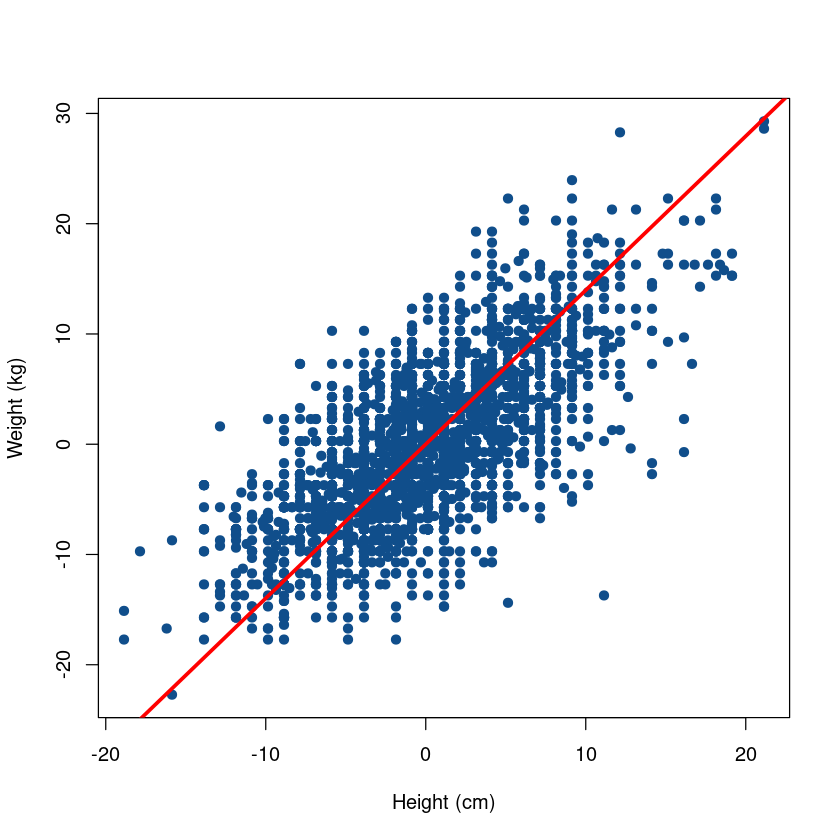

In [12]:
plot(data$height.c, data$weight.c,
    pch = 19, col = "dodgerblue4",
    xlab = "Height (cm)", ylab = "Weight (kg)")
abline(a = 0, b = ev$vectors[2,1]/ev$vectors[1,1], 
       col = "red", lwd = 3)

Let us rotate the data so that the red line becomes the "x-axis". To do that, we use a rotation matrix,
$$
R_\theta = \begin{pmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{pmatrix}.
$$
To find the angle $\theta$, recall that $\tan\theta$ is equal to opposite length over adjacent length, i.e., 
$$
\tan\theta = \frac{\tt ev\$vectors[2,1]}{\tt ev\$vectors[1,1]}
$$
So we just use the $\arctan$ of this. (Note that angles are in radians.)

In [13]:
theta = atan(ev$vectors[2,1]/ev$vectors[1,1])
theta
R_theta = matrix(c(cos(theta), -sin(theta),
                  sin(theta), cos(theta)),
                nr = 2, byrow = TRUE)
R_theta

[1] 0.949583

0.5820222,-0.8131729
0.8131729,0.5820222


And now we rotate the points. (In this case, we think of the points as vectors, of course.)

In [14]:
tmp_in = matrix(c(data$weight.c, data$height.c),
                nc = 2)
tmp_out = c()
for (i in 1:dim(tmp_in)[1]) {
    tmp_out = rbind(tmp_out,
                    t(R_theta %*% tmp_in[i,]))
}
data$weight.c_r = tmp_out[,1]
data$height.c_r = tmp_out[,2]

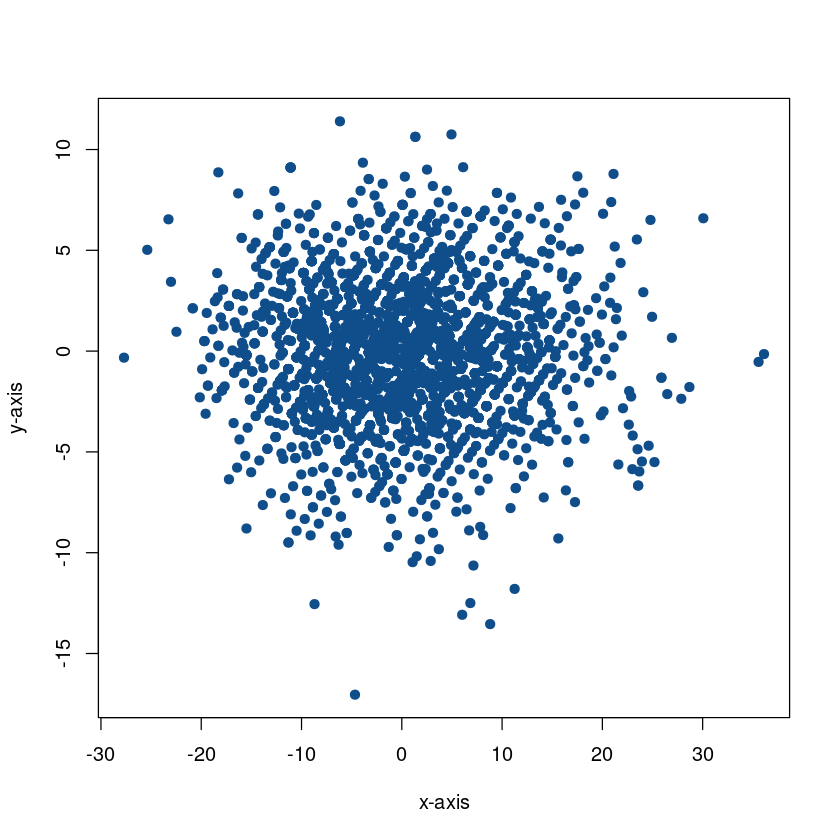

In [15]:
plot(data$height.c_r, data$weight.c_r,
    pch = 19, col = "dodgerblue4",
    xlab = "x-axis", ylab = "y-axis")

Note that the axes have changed quite a lot, hence the very different aspect. Let us plot with the same range as for the non-rotated data for the y-axis.

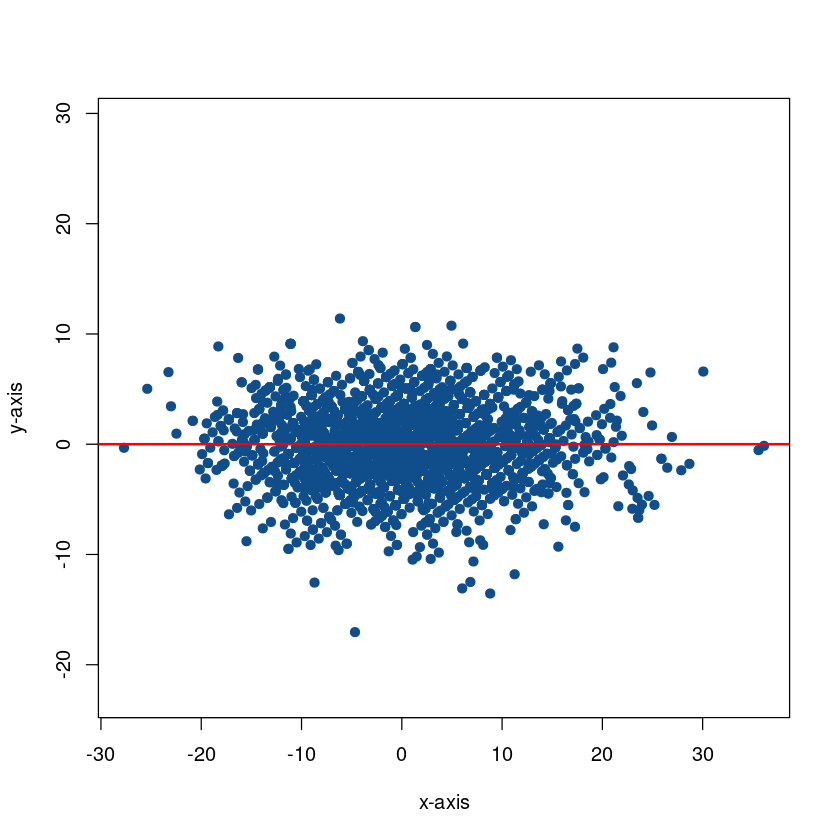

In [19]:
plot(data$height.c_r, data$weight.c_r,
    pch = 19, col = "dodgerblue4",
    xlab = "x-axis", ylab = "y-axis",
    ylim = range(data$weight.c))
abline(h = 0, col = "red", lwd = 2)

Now do things "properly".

In [20]:
if (!require("pracma")) {
    install.packages("pracma")
    library(pracma)
}

Loading required package: pracma



In [21]:
GS = pracma::gramSchmidt(A = ev$vectors)

In [21]:
GS

0.5820222,-0.8131729
0.8131729,0.5820222
1,-5.551115e-17
0,1.000000e+00


Now recall we saw a theorem that told us how to construct a new basis..

0.5820222,-0.8131729,1,0
0.8131729,0.5820222,0,1


1,0,0.5820222,0.8131729
0,1,-0.8131729,0.5820222


0.5820222,0.8131729
-0.8131729,0.5820222


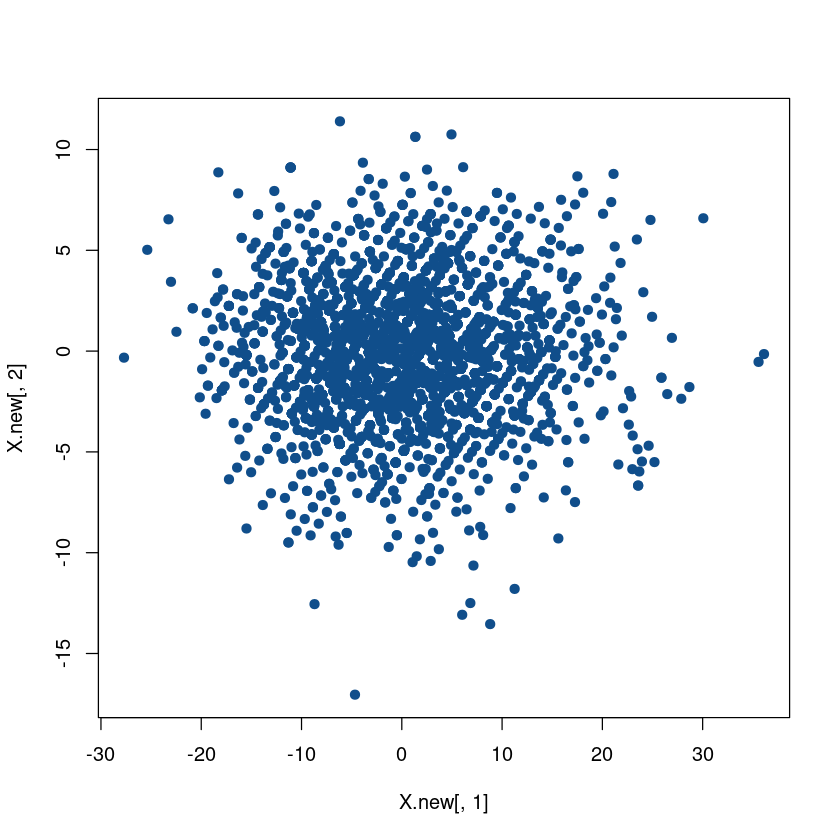

In [22]:
A=matrix(c(GS$Q,1,0,0,1), nr = 2)
A
pracma::rref(A)
P = pracma::rref(A)[,c(3,4)]
P
X.new = X %*% t(P)
#for (i in 1:dim(X)[1]) {
#    X.new[i,] = P %*% X[i,]
#}
plot(X.new[,1], X.new[,2],
    pch = 19, col = "dodgerblue4")